In [1]:
import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

<br />

### 데이터 설정

In [2]:
train_set = "./Data/training_set/training_set/"
test_set = "./Data/test_set/test_set/"
for train in os.listdir(train_set):
    print(train)

cats
dogs


<br />

### 데이터 전처리

* ImageDataGenerator를 활용해서 데이터 증식을 시킬 수 있음.

* 여기서 test 데이터는 확인용 데이터이므로 증식시키지 않고, **rescale**을 통해서 정규화만 진행

In [3]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

그리고 class_mode는 일단 cat, dog 두 가지 이므로 **binary**로 설정하여 2개의 class로 설정

In [16]:
train_dataset = train_data.flow_from_directory(train_set, target_size=(128,128), batch_size=32, class_mode="binary")
test_dataset = test_data.flow_from_directory(test_set, target_size=(128,128), batch_size=32, class_mode="binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


<br />

### 데이터 확인

**class** 확인해보기

In [5]:
print(train_dataset.class_indices)
print(test_dataset.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


**Image** 확인

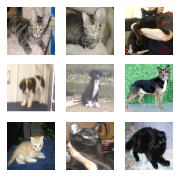

In [6]:
plt.figure(figsize=(3, 3))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_dataset[0][0][i])
    plt.axis("off")
    plt.grid(False)
plt.show()

<br />

### 모델 생성 및 컴파일

* 일단, 이미지 분류와 동일한 구조로 해봤다!
* 여기서 차이점은 class를 binary로 나눴기 때문에, 마지막 layer의 활성함수를 sigmoid로 설정하였다.

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, 4, strides=2, padding="same", input_shape = (128,128, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(8, 4, strides=2, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(8, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 4)         196       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 8)         520       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 16)         

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

기본적으로 만든 모델을 활용해 학습을 시켜본다.

In [41]:
epochs=20

In [42]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=epochs, batch_size=32)

Epoch 1/20
251/251 [==============================] - 22s 87ms/step - loss: 0.6921 - accuracy: 0.5215 - val_loss: 0.6878 - val_accuracy: 0.5828
Epoch 2/20
251/251 [==============================] - 22s 86ms/step - loss: 0.6821 - accuracy: 0.5640 - val_loss: 0.6636 - val_accuracy: 0.5917
Epoch 3/20
251/251 [==============================] - 22s 86ms/step - loss: 0.6492 - accuracy: 0.6234 - val_loss: 0.6451 - val_accuracy: 0.6293
Epoch 4/20
251/251 [==============================] - 21s 85ms/step - loss: 0.6235 - accuracy: 0.6523 - val_loss: 0.6056 - val_accuracy: 0.6767
Epoch 5/20
251/251 [==============================] - 21s 85ms/step - loss: 0.6010 - accuracy: 0.6767 - val_loss: 0.6097 - val_accuracy: 0.6584
Epoch 6/20
251/251 [==============================] - 22s 86ms/step - loss: 0.5861 - accuracy: 0.6889 - val_loss: 0.5816 - val_accuracy: 0.6995
Epoch 7/20
251/251 [==============================] - 21s 85ms/step - loss: 0.5819 - accuracy: 0.6943 - val_loss: 0.5774 - val_accuracy:

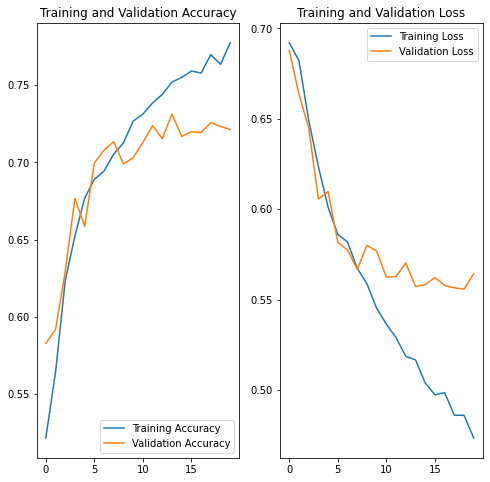

In [43]:
plt.figure(figsize=(8, 8))
# 1. Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 2. Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
print("{:.4f}".format(model.evaluate(test_dataset)[1]))

64/64 [==============================] - 4s 62ms/step - loss: 0.5643 - accuracy: 0.7212 0s - loss: 0
0.7212


<br />

### 모델 예측

* 처음 만든 모델로 한 번 예측을 해봤다. 음...으응ㅁ...
* 여기서 predicted에 대한 기준을 어떻게 둬야할지 모르겠어서 그냥 0.5로 일단 해봤는데 뭔가 이상하다

In [ ]:
predicted = model.predict(test_dataset)

In [ ]:
predicted

In [ ]:
# plt.figure(figsize=(20, 4))
# for i in range(10):
#     if predicted[i][0]<0.5:
#         pred_val = 'cat'
#     else:
#         pred_val = 'dog'
    
#     plt.subplot(2, 10, i + 1)
#     plt.imshow(test_dataset[0][0][i])
#     plt.title(f" {pred_val}")

넌 왜 개야?

<br />

### 다시 모델 생성(반복)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape = (64, 64, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

In [ ]:
plt.figure(figsize=(8, 8))
# 1. Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_1.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history_1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 2. Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_1.history['loss'], label='Training Loss')
plt.plot(range(epochs), history_1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("{:.4f}".format(model_1.evaluate(test_dataset)[1]))

<br />

### 데이터 증식

* ImageDataGenerator 옵션
    * shear_range : 밀린 강도 범위 내에서 변형
    * zoom_range : 지정된 확대/축소 범위 내에서 변형
    * horizontal_flip : 수평 방향으로 뒤집기 (mnist와 같은 글자에서는 적용시키지 않는다.)
    * vertical_flip : 수직 방향으로 뒤집기
    * rescale
    * rotation_range : 지정된 각도 범위 내에서 변형
    * width_shift_range : 지정된 수평 방향 이동 범위 내에서 변형
    * heght_shift_range : 지정된 수직 방향 이동 범위 내에서 변형

In [ ]:
train_data_1 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               zoom_range=0.2,
                                                               horizontal_flip=True,
                                                               rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2
                                                              )

In [ ]:
train_dataset_1 = train_data_1.flow_from_directory(train_set, target_size=(64, 64), batch_size=32, class_mode="binary")

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape = (64, 64, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_dataset_1, validation_data=test_dataset, epochs=epochs)

In [ ]:
plt.figure(figsize=(8, 8))
# 1. Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_2.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 2. Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_2.history['loss'], label='Training Loss')
plt.plot(range(epochs), history_2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("{:.4f}".format(model_2.evaluate(test_dataset)[1]))